# Whole Corn Excel

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

wc= pd.read_csv("C:/Users/msteinme/Documents/corn2.csv")
wc.head()


,Year,State,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
0,1998,CO,1179.248,95.085,68.010,NaN,98.166,21.550,NaN,3.18,18.77,62.3
1,1999,CO,1231.005,97.765,62.889,15.790,138.141,38.186,17.025,1.03,20.03,60.0
2,2000,CO,1348.328,94.611,78.412,NaN,142.775,39.903,NaN,-2.31,16.91,63.5
3,2001,CO,1219.856,NaN,NaN,NaN,NaN,41.078,NaN,-2.69,16.81,63.1
4,2005,CO,1100.402,90.367,67.521,20.294,125.608,35.262,NaN,0.69,18.95,61.9


In [2]:
co=wc[wc['State']=='CO']#another way to get the state you are interested in
co

,Year,State,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
0,1998,CO,1179.248,95.085,68.010,NaN,98.166,21.550,NaN,3.18,18.77,62.3
1,1999,CO,1231.005,97.765,62.889,15.790,138.141,38.186,17.025,1.03,20.03,60.0
2,2000,CO,1348.328,94.611,78.412,NaN,142.775,39.903,NaN,-2.31,16.91,63.5
3,2001,CO,1219.856,NaN,NaN,NaN,NaN,41.078,NaN,-2.69,16.81,63.1
4,2005,CO,1100.402,90.367,67.521,20.294,125.608,35.262,NaN,0.69,18.95,61.9
5,2010,CO,1329.949,97.717,NaN,NaN,130.711,29.478,NaN,0.69,18.19,62.1


In [3]:
#planted amount grouped by state
groupall=wc['Planted'].groupby(wc['State']).sum()
groupall

State
CO     7408.788
GA      833.251
IA    99701.660
IL    90497.639
IN    46504.877
KS    24000.726
KY     9035.406
MI    18783.995
MN    57798.760
MO    22751.193
NC     5691.278
ND     5403.123
NE    69149.117
NY     4049.685
OH    27200.351
PA     8750.434
SC      399.619
SD    32407.119
TX    14504.813
WI    29600.524
Name: Planted, dtype: float64

# Iowa Corn

In [4]:
#want to look at just Iowa Row so get rid of the rest
wci=wc[['Year','Planted', 'Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
wci

,Year,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
9,1996,12699.814,97.607,82.779,81.127,131.530,59.661,76.282,0.68,33.66,65.4
10,1997,12198.968,99.140,74.865,75.024,121.065,63.001,72.993,0.40,29.21,66.4
11,1998,12499.059,95.488,80.059,80.429,128.078,61.329,79.856,1.79,39.57,69.4
12,1999,12101.155,97.891,75.270,75.027,127.092,66.265,80.774,0.92,32.28,67.5
13,2000,12303.371,95.345,73.721,73.919,130.709,55.491,69.384,-1.06,29.73,68.0
14,2001,11696.685,91.153,62.139,61.907,120.296,NaN,NaN,0.21,34.59,67.6
15,2005,12802.748,91.441,72.905,73.198,141.242,64.255,82.586,-0.36,29.84,68.8
16,2010,13399.860,95.154,71.515,68.186,141.426,64.981,80.547,5.27,44.05,68.6


In [5]:
wci2=wc[['Planted', 'Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
wci2

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
9,12699.814,97.607,82.779,81.127,131.530,59.661,76.282,0.68,33.66,65.4
10,12198.968,99.140,74.865,75.024,121.065,63.001,72.993,0.40,29.21,66.4
11,12499.059,95.488,80.059,80.429,128.078,61.329,79.856,1.79,39.57,69.4
12,12101.155,97.891,75.270,75.027,127.092,66.265,80.774,0.92,32.28,67.5
13,12303.371,95.345,73.721,73.919,130.709,55.491,69.384,-1.06,29.73,68.0
14,11696.685,91.153,62.139,61.907,120.296,NaN,NaN,0.21,34.59,67.6
15,12802.748,91.441,72.905,73.198,141.242,64.255,82.586,-0.36,29.84,68.8
16,13399.860,95.154,71.515,68.186,141.426,64.981,80.547,5.27,44.05,68.6


In [6]:
#descriptive statistics for Iowa Corn
wci2.describe()

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
count,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,8.000000,8.000000
mean,12462.707500,95.402375,74.156625,73.602125,130.179750,62.140429,77.488857,0.981250,34.116250,67.712500
std,516.012264,2.899396,6.142157,6.252497,7.979201,3.681345,4.814675,1.928741,5.262047,1.310875
min,11696.685000,91.153000,62.139000,61.907000,120.296000,55.491000,69.384000,-1.060000,29.210000,65.400000
25%,12174.514750,94.225750,72.557500,71.945000,125.585250,60.495000,74.637500,0.067500,29.812500,67.225000
50%,12401.215000,95.416500,74.293000,74.471500,129.393500,63.001000,79.856000,0.540000,32.970000,67.800000
75%,12725.547500,97.678000,76.467250,76.377500,133.958000,64.618000,80.660500,1.137500,35.835000,68.650000
max,13399.860000,99.140000,82.779000,81.127000,141.426000,66.265000,82.586000,5.270000,44.050000,69.400000


In [7]:
#pearson correlation matrix for Iowa Corn
wci2.corr()

,Planted,Acres treated with N,acres treated with P,acres treated with K,N applied,P applied,K applied,PDSI,Precip,Avg Temp
Planted,1.000000,0.031012,0.362552,0.214185,0.886557,0.213697,0.441554,0.662084,0.538712,0.248767
Acres treated with N,0.031012,1.000000,0.654899,0.619857,-0.269232,-0.013551,-0.433098,0.120643,-0.100520,-0.543316
acres treated with P,0.362552,0.654899,1.000000,0.978301,0.187535,-0.314481,-0.058699,0.026571,-0.008554,-0.241730
acres treated with K,0.214185,0.619857,0.978301,1.000000,0.082554,-0.362845,-0.123867,-0.141830,-0.151096,-0.207228
N applied,0.886557,-0.269232,0.187535,0.082554,1.000000,0.179583,0.513674,0.402104,0.325677,0.399156
P applied,0.213697,-0.013551,-0.314481,-0.362845,0.179583,1.000000,0.790904,0.490131,0.265038,0.168523
K applied,0.441554,-0.433098,-0.058699,-0.123867,0.513674,0.790904,1.000000,0.463253,0.448668,0.438259
PDSI,0.662084,0.120643,0.026571,-0.141830,0.402104,0.490131,0.463253,1.000000,0.907036,0.264707
Precip,0.538712,-0.100520,-0.008554,-0.151096,0.325677,0.265038,0.448668,0.907036,1.000000,0.412950
Avg Temp,0.248767,-0.543316,-0.241730,-0.207228,0.399156,0.168523,0.438259,0.264707,0.412950,1.000000


In [8]:
#correlation matrix using spearman
stats.spearmanr(wci2.corr()) #spearman outliers don't affect

SpearmanrResult(correlation=array([[ 1.        , -0.32121212,  0.03030303, -0.03030303,  0.89090909,
         0.26060606,  0.40606061,  0.57575758,  0.70909091,  0.44242424],
       [-0.32121212,  1.        ,  0.76969697,  0.67272727, -0.61212121,
        -0.47878788, -0.64848485, -0.32121212, -0.5030303 , -0.93939394],
       [ 0.03030303,  0.76969697,  1.        ,  0.95151515, -0.23636364,
        -0.78181818, -0.6969697 , -0.53939394, -0.47878788, -0.6969697 ],
       [-0.03030303,  0.67272727,  0.95151515,  1.        , -0.21212121,
        -0.75757576, -0.62424242, -0.63636364, -0.56363636, -0.63636364],
       [ 0.89090909, -0.61212121, -0.23636364, -0.21212121,  1.        ,
         0.38181818,  0.6       ,  0.49090909,  0.63636364,  0.64848485],
       [ 0.26060606, -0.47878788, -0.78181818, -0.75757576,  0.38181818,
         1.        ,  0.87878788,  0.81818182,  0.63636364,  0.45454545],
       [ 0.40606061, -0.64848485, -0.6969697 , -0.62424242,  0.6       ,
         0.878787

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5]),
 <a list of 10 Text xticklabel objects>)

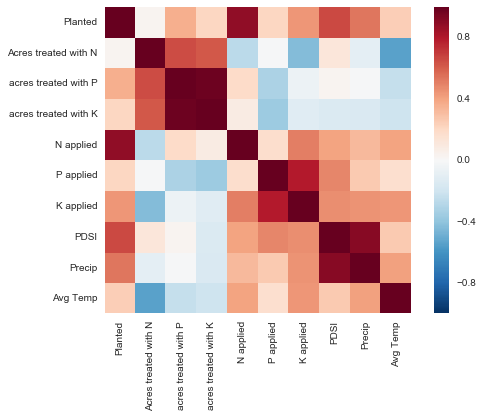

In [9]:
#correlation matrix
import pandas
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
cm=wci2.corr()
sns.heatmap(cm,square=True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

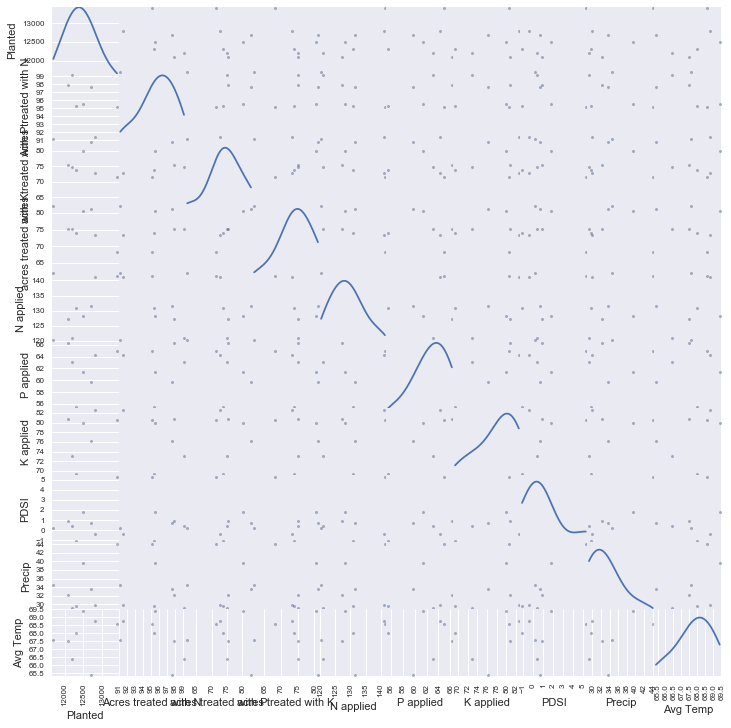

In [21]:
#not enough observations to use histogram, and not enough observations to get rid of any more outliers so I am keeping them in
import pandas as pd
import numpy as np

#scatterplot matrix
dataframe=pd.DataFrame(wci2)
scatterplot= pd.scatter_matrix(dataframe,figsize=(12,12),diagonal='kde', marker='.',grid= True)

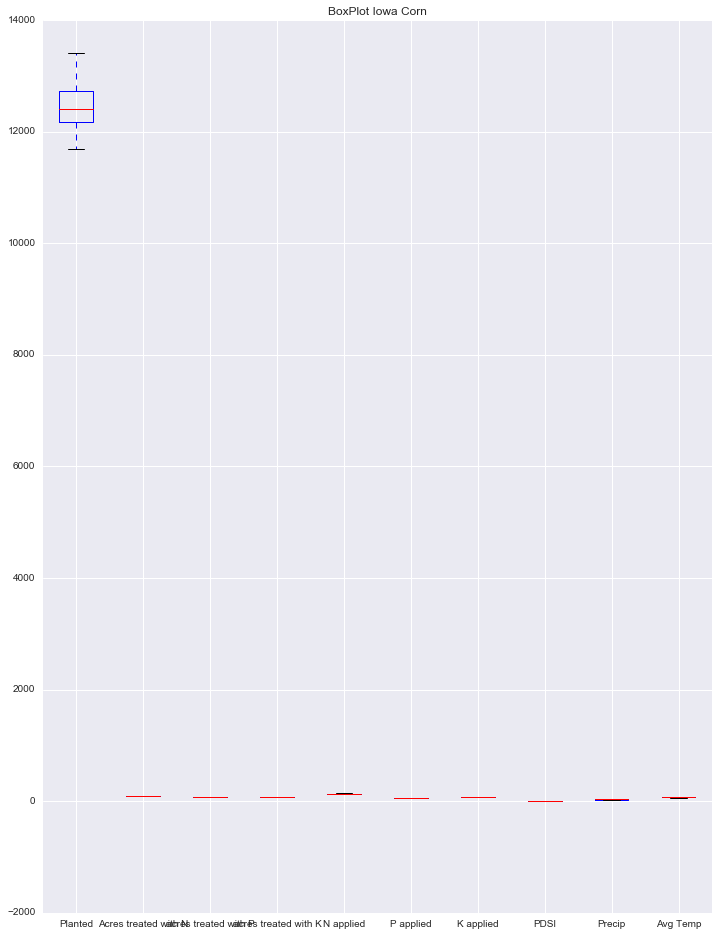

In [10]:
#box plot of each of the variables except years
import matplotlib.pyplot as plt
%matplotlib inline
#creating new one that doesn't have yr called wci2
plt.show(wci2.plot(kind='box', figsize=(12,16),title=('BoxPlot Iowa Corn')))

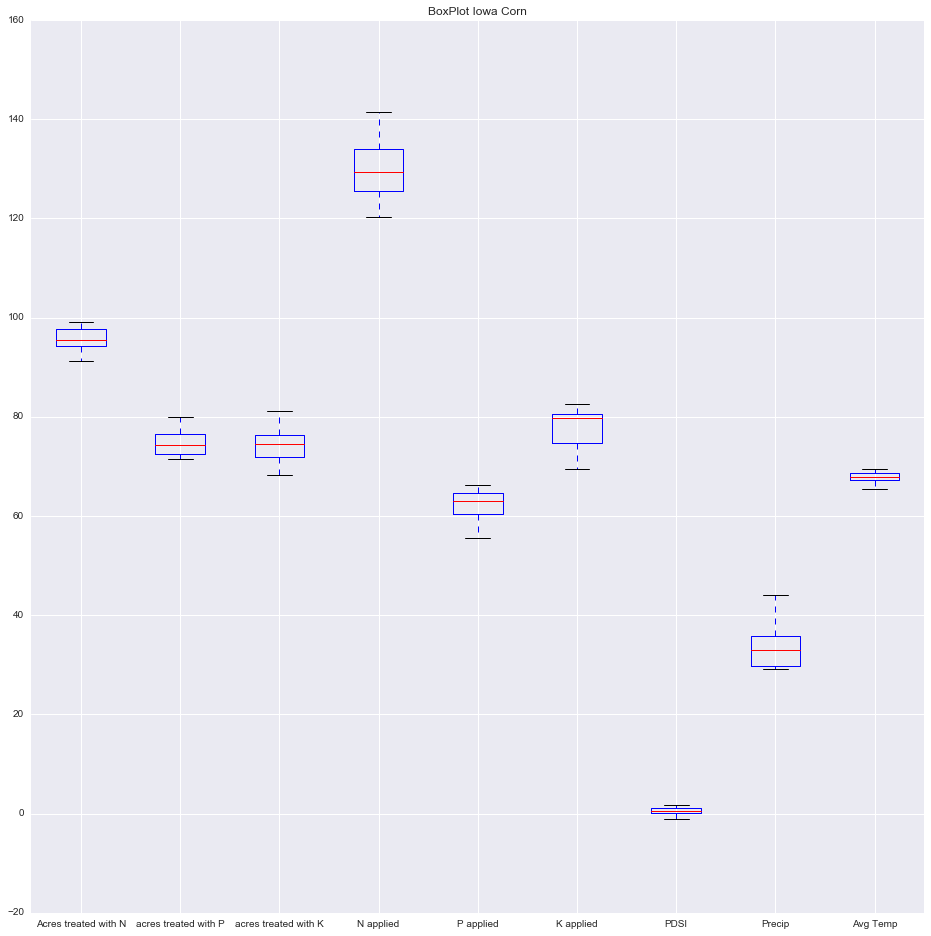

In [11]:
wci3=wc[['Acres treated with N','acres treated with P', 'acres treated with K', 'N applied', 'P applied', 'K applied','PDSI', 'Precip','Avg Temp']][9:17]
plt.show(wci3.plot(kind='box', figsize=(16,16),title=('BoxPlot Iowa Corn')))

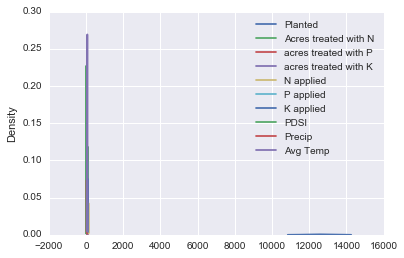

In [12]:
wciden=pd.DataFrame(wci2)
density_plot=wciden.plot(kind='density') #bad idea

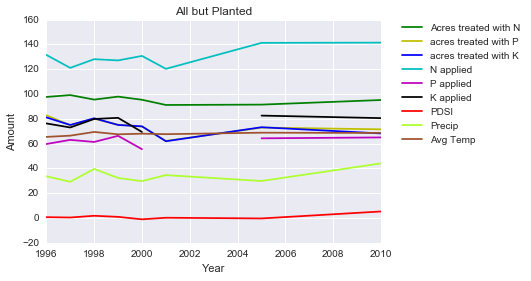

In [27]:
x1= (wci['Year'])
y1=(wci['Planted'])
y2=(wci['Acres treated with N'])
y3=(wci['acres treated with P'])
y4=(wci['acres treated with K'])
y5=(wci['N applied'])
y6=(wci['P applied'])
y7=(wci['K applied'])
y8=(wci['PDSI'])
y9=(wci['Precip'])
y10=(wci['Avg Temp'])
plt.figure()
#plt.plot(x1,y1,'r') #didn't include because otherwise not good graph
plt.plot(x1,y2,'g')
plt.plot(x1,y3,'y')
plt.plot(x1,y4,'b')
plt.plot(x1,y5,'c')
plt.plot(x1,y6,'m')
plt.plot(x1,y7,'k')
plt.plot(x1,y8,'r')
plt.plot(x1,y9,'#adff2f')
plt.plot(x1,y10,'#a0522d')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('All but Planted')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

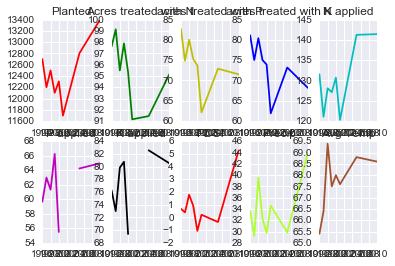

In [14]:
x1= (wci['Year'])
y1=(wci['Planted'])
y2=(wci['Acres treated with N'])
y3=(wci['acres treated with P'])
y4=(wci['acres treated with K'])
y5=(wci['N applied'])
y6=(wci['P applied'])
y7=(wci['K applied'])
y8=(wci['PDSI'])
y9=(wci['Precip'])
y10=(wci['Avg Temp'])
plt.subplot(2,5,1)
plt.plot(x1,y1,'r')
plt.title('Planted')

plt.subplot(2,5,2)
plt.plot(x1,y2,'g')
plt.title('Acres treated with N')

plt.subplot(2,5,3)
plt.plot(x1,y3,'y')
plt.title('acres treated with P')

plt.subplot(2,5,4)
plt.plot(x1,y4,'b')
plt.title('acres treated with K')

plt.subplot(2,5,5)
plt.plot(x1,y5,'c')
plt.title('N applied')

plt.subplot(2,5,6)
plt.plot(x1,y6,'m')
plt.title('P applied')

plt.subplot(2,5,7)
plt.plot(x1,y7,'k')
plt.title('K applied')

plt.subplot(2,5,8)
plt.plot(x1,y8,'r')
plt.title('PDSI')

plt.subplot(2,5,9)
plt.plot(x1,y9,'#adff2f')
plt.title('Precip')

plt.subplot(2,5,10)
plt.plot(x1,y10,'#a0522d')
plt.title('Avg Temp')


plt.show()

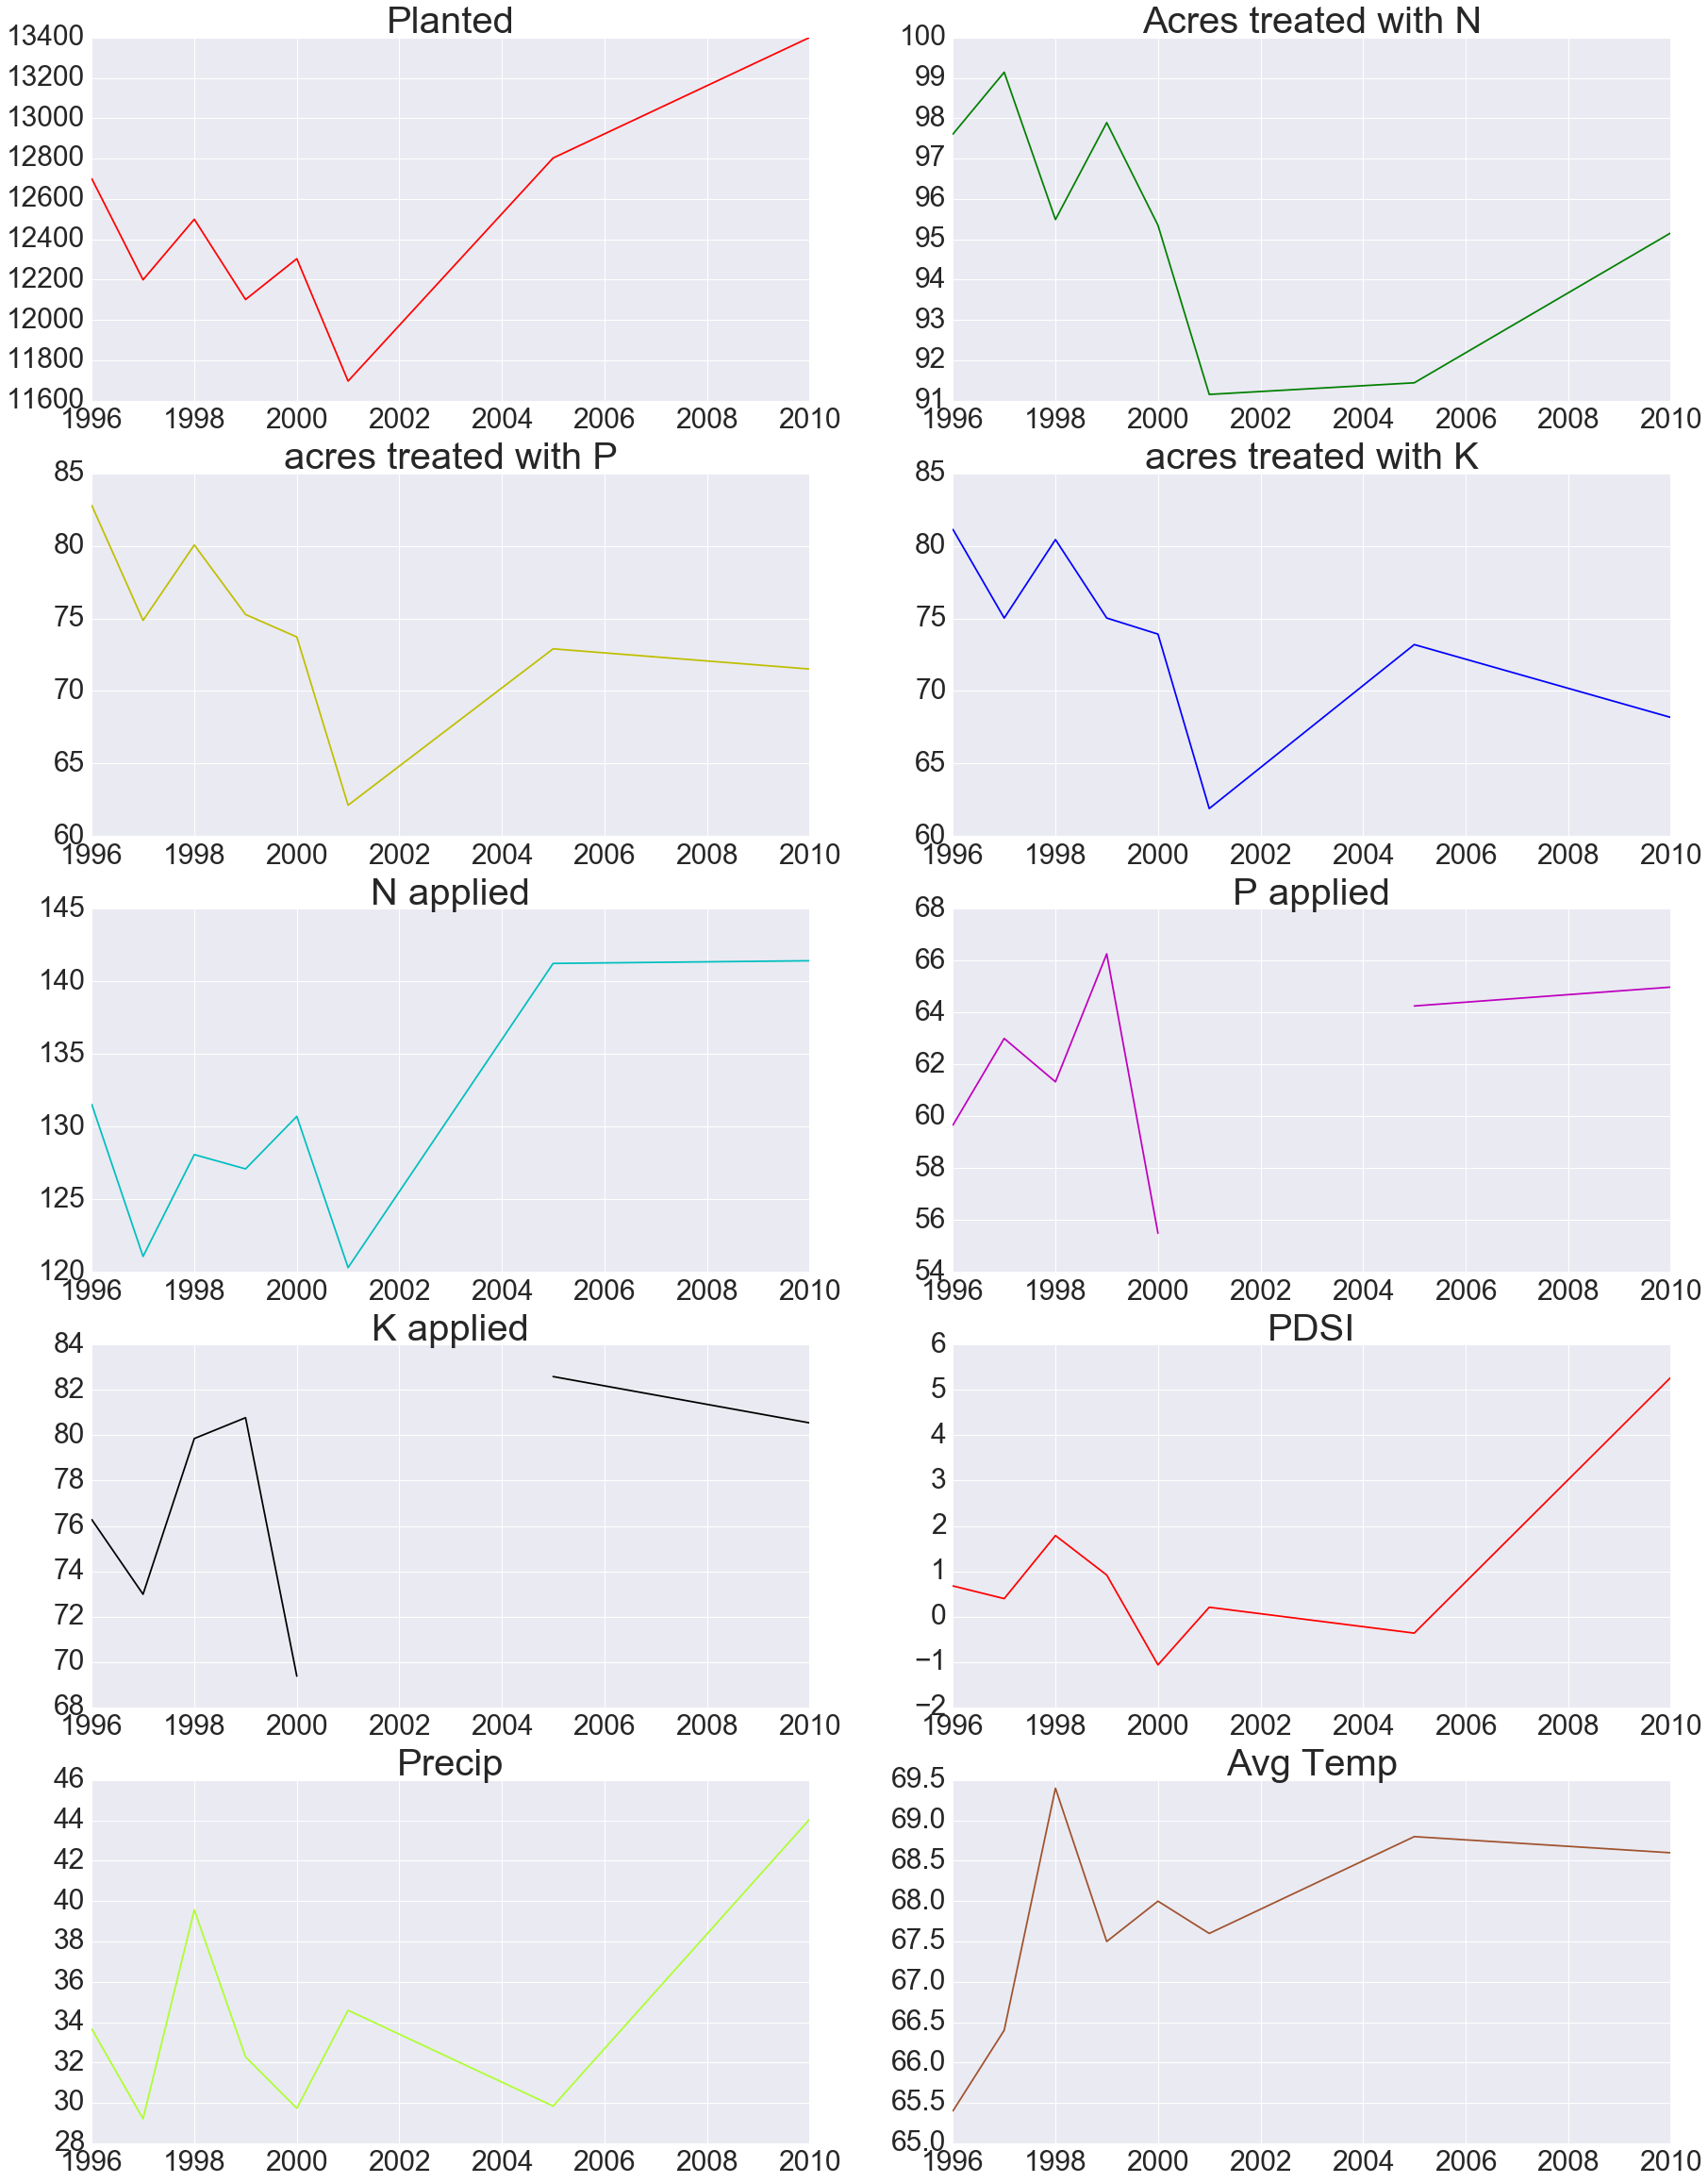

In [15]:
fig=plt.figure(figsize=(30,40))
ax1= fig.add_subplot(521)
ax2= fig.add_subplot(522)
ax3= fig.add_subplot(523)
ax4= fig.add_subplot(524)
ax5= fig.add_subplot(525)
ax6= fig.add_subplot(526)
ax7= fig.add_subplot(527)
ax8= fig.add_subplot(528)
ax9= fig.add_subplot(529)
ax10= fig.add_subplot(5,2,10)
ax1.set_title('Planted',size=(40))
ax2.set_title('Acres treated with N',size=(40))
ax3.set_title('acres treated with P',size=(40))
ax4.set_title('acres treated with K',size=(40))
ax5.set_title('N applied',size=(40))
ax6.set_title('P applied',size=(40))
ax7.set_title('K applied',size=(40))
ax8.set_title('PDSI',size=(40))
ax9.set_title('Precip',size=(40))
ax10.set_title('Avg Temp',size=(40))
ax1.tick_params(axis='x', which='major', labelsize=30)
ax1.tick_params(axis='y', which='major', labelsize=30)
ax2.tick_params(axis='x', which='major', labelsize=30)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax3.tick_params(axis='x', which='major', labelsize=30)
ax3.tick_params(axis='y', which='major', labelsize=30)
ax4.tick_params(axis='x', which='major', labelsize=30)
ax4.tick_params(axis='y', which='major', labelsize=30)
ax5.tick_params(axis='x', which='major', labelsize=30)
ax5.tick_params(axis='y', which='major', labelsize=30)
ax6.tick_params(axis='x', which='major', labelsize=30)
ax6.tick_params(axis='y', which='major', labelsize=30)
ax7.tick_params(axis='x', which='major', labelsize=30)
ax7.tick_params(axis='y', which='major', labelsize=30)
ax8.tick_params(axis='x', which='major', labelsize=30)
ax8.tick_params(axis='y', which='major', labelsize=30)
ax9.tick_params(axis='x', which='major', labelsize=30)
ax9.tick_params(axis='y', which='major', labelsize=30)
ax10.tick_params(axis='x', which='major', labelsize=30)
ax10.tick_params(axis='y', which='major', labelsize=30)
ax1.plot(x1,y1,'r')
ax2.plot(x1,y2,'g')
ax3.plot(x1,y3,'y')
ax4.plot(x1,y4,'b')
ax5.plot(x1,y5,'c')
ax6.plot(x1,y6,'m')
ax7.plot(x1,y7,'k')
ax8.plot(x1,y8,'r')
ax9.plot(x1,y9,'#adff2f')
ax10.plot(x1,y10,'#a0522d')

plt.show()

